In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### 1. First, load the dataset.

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexpectancy_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

### 2. Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [3]:
lifeexpectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
lifeexpectancy_df.columns = lifeexpectancy_df.columns.str.replace(' ', '')

In [5]:
lifeexpectancy_df.columns.str.lower()

Index(['country', 'year', 'status', 'lifeexpectancy', 'adultmortality',
       'infantdeaths', 'alcohol', 'percentageexpenditure', 'hepatitisb',
       'measles', 'bmi', 'under-fivedeaths', 'polio', 'totalexpenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness1-19years',
       'thinness5-9years', 'incomecompositionofresources', 'schooling'],
      dtype='object')

In [6]:
lifeexpectancy_df = lifeexpectancy_df.rename(columns={'country':'Country', 'year':'Year', 'status':'Status',
                                                      'infantdeaths':'Infant_Deaths', 'alcohol':'Alcohol',
                                                      'measles':'Measels','bmi':'BMI', 'under-fivedeaths':'Under_five_Deaths',
                                                      'polio':'Polio', 'diphtheria':'Diphtheria', 'hiv/aids':'HIV/AIDS', 
                                                      'gdp':'GDP', 'population':'Population', 'thinness1-19years':'Thinness_1_to_19_Years',
                                                      'Incomecompositionofresources':'Income_Composition_of_Resources', 'schooling':'Schooling',
                                                      'Lifeexpectancy':'Life_Expectancy', 'AdultMortality':'Adult_Mortality',
                                                      'percentageexpenditure':'Percentage_Expenditure', 'HepatitisB':'Hepatitis_B',
                                                      'Totalexpenditure':'Total_Expenditure', 'thinness5-9years':'Thinness_5_to_9_Years'})

In [7]:
fill_list = ['Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1_to_19_Years',
       'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling']

Country = lifeexpectancy_df["Country"].unique()

for Country in Country:
    lifeexpectancy_df.loc[lifeexpectancy_df["Country"] == Country, fill_list] = lifeexpectancy_df.loc[lifeexpectancy_df["Country"] == Country, fill_list].interpolate()

# we drop the null values after interpolation
lifeexpectancy_df.dropna(inplace=True)

In [8]:
lifeexpectancy_df.info()
lifeexpectancy_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
Country                            1987 non-null object
Year                               1987 non-null int64
Status                             1987 non-null object
Life_Expectancy                    1987 non-null float64
Adult_Mortality                    1987 non-null float64
Infant_Deaths                      1987 non-null int64
Alcohol                            1987 non-null float64
Percentage_Expenditure             1987 non-null float64
Hepatitis_B                        1987 non-null float64
Measles                            1987 non-null int64
BMI                                1987 non-null float64
Under_five_Deaths                  1987 non-null int64
Polio                              1987 non-null float64
Total_Expenditure                  1987 non-null float64
Diphtheria                         1987 non-null float64
HIV/AIDS                           1987 non-null

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1_to_19_Years,Thinness_5_to_9_Years,Income_Composition_of_Resources,Schooling
count,1987,1987.000000,1987,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
unique,133,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Albania,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2006.984902,NaN,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,...,80.371917,5.902728,80.454454,2.274937,5392.335709,1.358390e+07,5.129995,5.199346,0.603453,11.639054
std,NaN,4.323147,NaN,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,...,24.363376,2.287467,24.450153,6.005112,11480.810350,6.490113e+07,4.750149,4.844382,0.206026,3.212964
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2003.000000,NaN,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,...,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,NaN,2007.000000,NaN,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,...,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,NaN,2011.000000,NaN,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,...,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000


Since the data is time sensitive I used interpolate to fill in the missing values then dropped the null values.

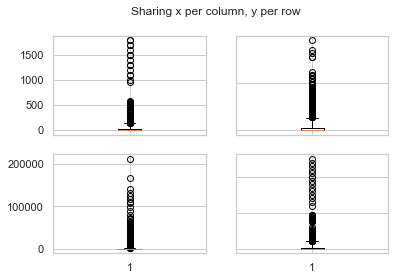

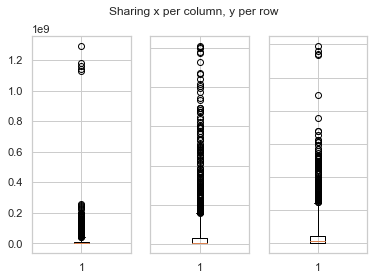

In [9]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.boxplot(lifeexpectancy_df["Infant_Deaths"], whis = 5)
ax2.boxplot(lifeexpectancy_df["Percentage_Expenditure"], whis = 5)
ax3.boxplot(lifeexpectancy_df["Measles"], whis = 5)
ax4.boxplot(lifeexpectancy_df["Under_five_Deaths"], whis = 5)

for ax in fig.get_axes():
    ax.label_outer()
    
fig, (bx1, bx2, bx3)= plt.subplots(1, 3)
fig.suptitle('Sharing x per column, y per row')
bx1.boxplot(lifeexpectancy_df["Population"], whis = 5)
bx2.boxplot(lifeexpectancy_df["HIV/AIDS"], whis = 5)
bx3.boxplot(lifeexpectancy_df["GDP"], whis = 5)
     
for ax in fig.get_axes():
    ax.label_outer()

Graphed the columns with outliers. I'll use the Winsorized method to clean the data.

In [10]:
from scipy.stats.mstats import winsorize

winsorized_Infant_Deaths = winsorize(lifeexpectancy_df["Infant_Deaths"], (0, 0.1))
winsorized_Percentage_Expenditure = winsorize(lifeexpectancy_df["Percentage_Expenditure"], (0, 0.1))
winsorized_Measles = winsorize(lifeexpectancy_df["Measles"], (0, 0.15))
winsorized_Under_five_Deaths = winsorize(lifeexpectancy_df["Under_five_Deaths"], (0, 0.1))
winsorized_Population = winsorize(lifeexpectancy_df["Population"], (0, 0.1))
winsorized_HIV_AIDS = winsorize(lifeexpectancy_df["HIV/AIDS"], (0, 0.1))
winsorized_GDP = winsorize(lifeexpectancy_df["GDP"], (0, 0.1))

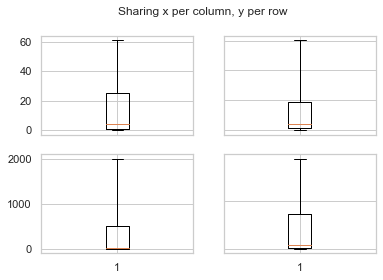

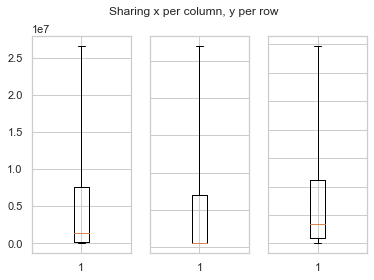

In [11]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.boxplot(winsorized_Infant_Deaths, whis = 5)
ax2.boxplot(winsorized_Percentage_Expenditure, whis = 5)
ax3.boxplot(winsorized_Measles, whis = 5)
ax4.boxplot(winsorized_Under_five_Deaths, whis = 5)

for ax in fig.get_axes():
    ax.label_outer()
    
    
fig, (bx1, bx2, bx3)= plt.subplots(1, 3)
fig.suptitle('Sharing x per column, y per row')
bx1.boxplot(winsorized_Population, whis = 5)
bx2.boxplot(winsorized_HIV_AIDS, whis = 5)
bx3.boxplot(winsorized_GDP, whis = 5)

for ax in fig.get_axes():
    ax.label_outer()

### 3. Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

In [12]:
lifeexpectancy_df[['Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1_to_19_Years',
       'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling']].corr()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1_to_19_Years,Thinness_5_to_9_Years,Income_Composition_of_Resources,Schooling
Life_Expectancy,1.000000,-0.660529,-0.160922,0.392617,0.413683,0.249625,-0.138133,0.599572,-0.187438,0.415188,0.199288,0.442943,-0.576373,0.443612,-0.010840,-0.458724,-0.450095,0.726753,0.744703
Adult_Mortality,-0.660529,1.000000,0.038304,-0.181469,-0.242438,-0.103382,-0.007269,-0.372519,0.052865,-0.208006,-0.096727,-0.210136,0.536273,-0.256955,-0.022403,0.278842,0.284581,-0.411010,-0.404160
Infant_Deaths,-0.160922,0.038304,1.000000,-0.104406,-0.089772,-0.216949,0.509747,-0.227769,0.996729,-0.152153,-0.147961,-0.156470,0.001739,-0.097720,0.562805,0.481580,0.487596,-0.137175,-0.195815
Alcohol,0.392617,-0.181469,-0.104406,1.000000,0.430835,0.106383,-0.029252,0.379327,-0.099713,0.239854,0.227108,0.245454,-0.033756,0.458112,-0.025556,-0.398731,-0.387087,0.532173,0.590261
Percentage_Expenditure,0.413683,-0.242438,-0.089772,0.430835,1.000000,-0.011530,-0.069316,0.277788,-0.092480,0.162606,0.217103,0.168910,-0.109680,0.963177,-0.016607,-0.268347,-0.268131,0.408174,0.426801
Hepatitis_B,0.249625,-0.103382,-0.216949,0.106383,-0.011530,1.000000,-0.142059,0.198627,-0.226512,0.451299,0.130435,0.552732,-0.104034,0.009077,-0.092418,-0.166903,-0.181161,0.239386,0.268951
Measles,-0.138133,-0.007269,0.509747,-0.029252,-0.069316,-0.142059,1.000000,-0.168172,0.519173,-0.113574,-0.111638,-0.119828,0.019600,-0.073858,0.269840,0.227961,0.223325,-0.137648,-0.146625
BMI,0.599572,-0.372519,-0.227769,0.379327,0.277788,0.198627,-0.168172,1.000000,-0.238155,0.264753,0.233643,0.266601,-0.239171,0.300517,-0.071306,-0.560982,-0.567943,0.539862,0.584998
Under_five_Deaths,-0.187438,0.052865,0.996729,-0.099713,-0.092480,-0.226512,0.519173,-0.238155,1.000000,-0.169989,-0.148325,-0.177302,0.013390,-0.101404,0.548761,0.483954,0.488759,-0.157039,-0.212678
Polio,0.415188,-0.208006,-0.152153,0.239854,0.162606,0.451299,-0.113574,0.264753,-0.169989,1.000000,0.153724,0.680436,-0.132156,0.188618,-0.026926,-0.204346,-0.205516,0.395265,0.437793


Positive Correlations with Life Expectancy
    - Alcohol
    - Percentage_Expenditure
    - Hepatitis_B
    - BMI
    - Polio
    - Total_Expenditure
    - Diphtheria
    - GDP
    - Income_Composition_of_Resources
    - Schooling

Negaive Correlations with Life Expectancy
    - Adult_Mortality
    - Infant_Deaths
    - Measels
    - Under-five_Deaths
    - HIV/Aids
    - Population
    - Thinness_1_to_19_Years
    - Thiness_5_to_9_Years

### 3. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy. 

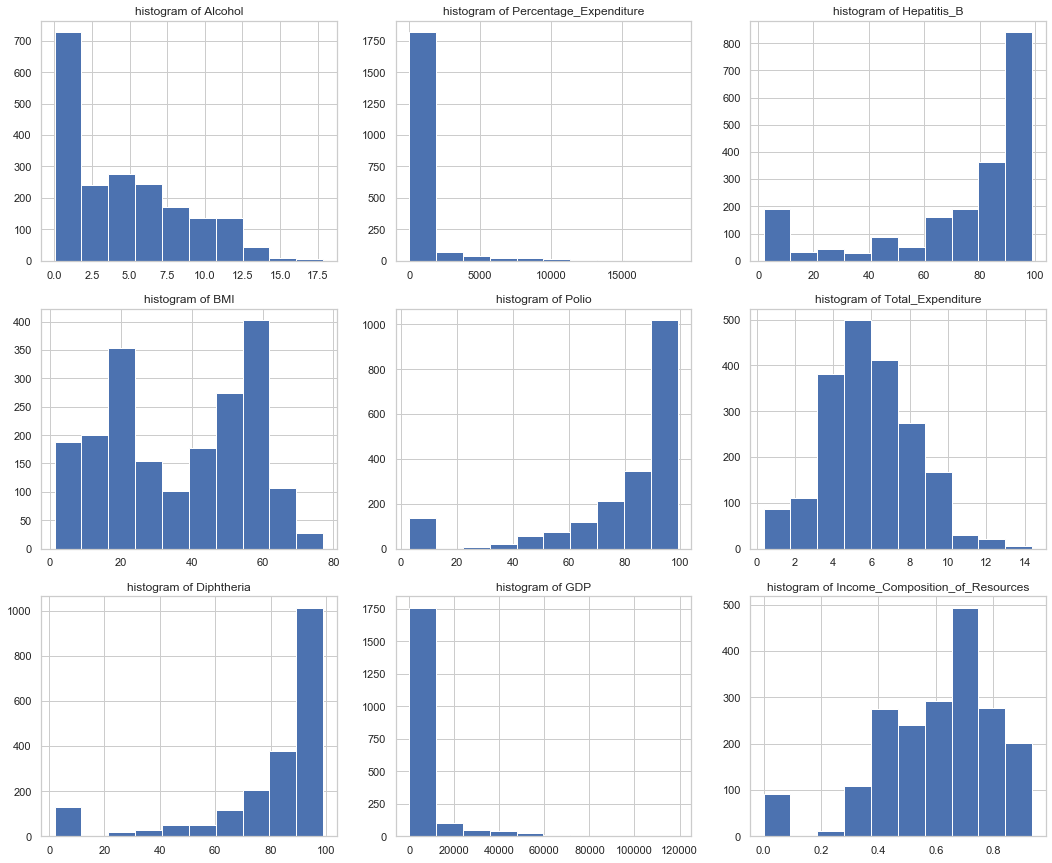

In [13]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(lifeexpectancy_df["Alcohol"])
plt.title("histogram of Alcohol")

plt.subplot(3, 3, 2)
plt.hist(lifeexpectancy_df["Percentage_Expenditure"])
plt.title("histogram of Percentage_Expenditure")

plt.subplot(3, 3, 3)
plt.hist(lifeexpectancy_df["Hepatitis_B"])
plt.title("histogram of Hepatitis_B")

plt.subplot(3, 3, 4)
plt.hist(lifeexpectancy_df["BMI"])
plt.title("histogram of BMI")

plt.subplot(3, 3, 5)
plt.hist(lifeexpectancy_df["Polio"])
plt.title("histogram of Polio")

plt.subplot(3, 3, 6)
plt.hist(lifeexpectancy_df["Total_Expenditure"])
plt.title("histogram of Total_Expenditure")

plt.subplot(3, 3, 7)
plt.hist(lifeexpectancy_df["Diphtheria"])
plt.title("histogram of Diphtheria")

plt.subplot(3, 3, 8)
plt.hist(lifeexpectancy_df["GDP"])
plt.title("histogram of GDP")

plt.subplot(3, 3, 9)
plt.hist(lifeexpectancy_df["Income_Composition_of_Resources"])
plt.title("histogram of Income_Composition_of_Resources")



plt.show()

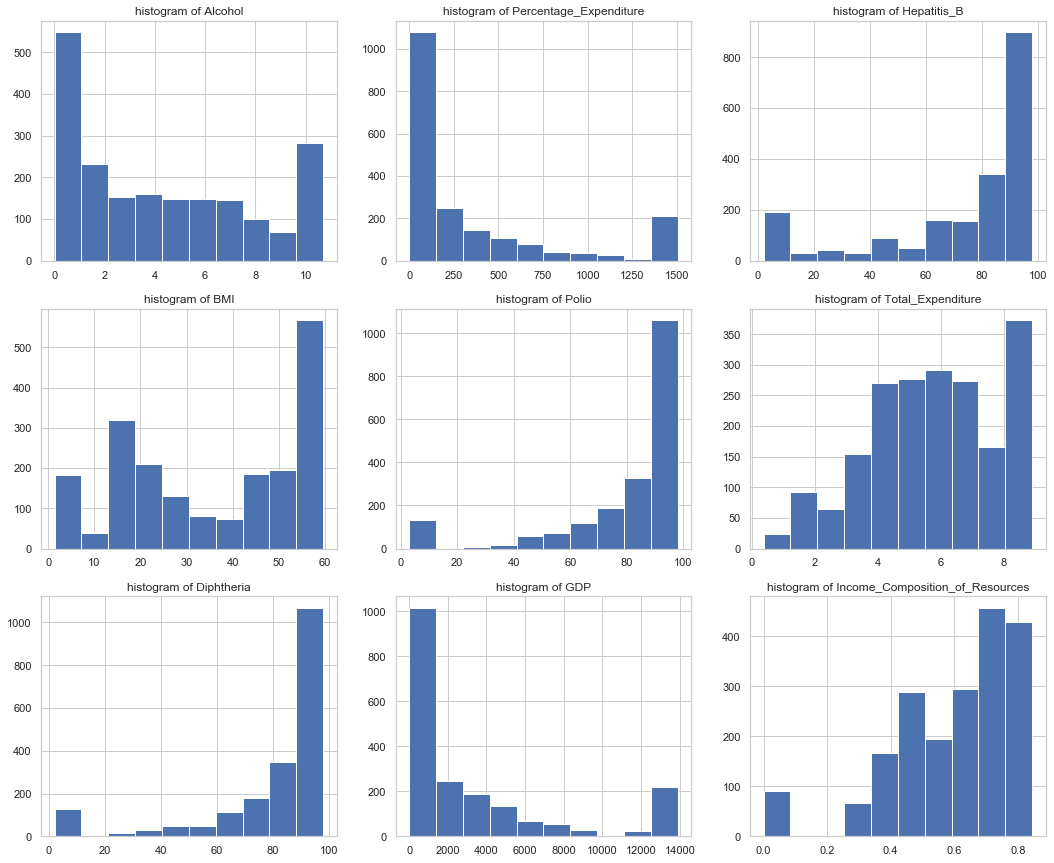

In [14]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(winsorize(lifeexpectancy_df["Alcohol"], (0, 0.1)))
plt.title("histogram of Alcohol")

plt.subplot(3, 3, 2)
plt.hist(winsorize(lifeexpectancy_df["Percentage_Expenditure"], (0.0, 0.1)))
plt.title("histogram of Percentage_Expenditure")

plt.subplot(3, 3, 3)
plt.hist(winsorize(lifeexpectancy_df["Hepatitis_B"], (0, 0.10)))
plt.title("histogram of Hepatitis_B")

plt.subplot(3, 3, 4)
plt.hist(winsorize(lifeexpectancy_df["BMI"], (0, 0.10)))
plt.title("histogram of BMI")

plt.subplot(3, 3, 5)
plt.hist(winsorize(lifeexpectancy_df["Polio"], (0, 0.10)))
plt.title("histogram of Polio")

plt.subplot(3, 3, 6)
plt.hist(winsorize(lifeexpectancy_df["Total_Expenditure"], (0, 0.10)))
plt.title("histogram of Total_Expenditure")

plt.subplot(3, 3, 7)
plt.hist(winsorize(lifeexpectancy_df["Diphtheria"], (0, 0.10)))
plt.title("histogram of Diphtheria")

plt.subplot(3, 3, 8)
plt.hist(winsorize(lifeexpectancy_df["GDP"], (0, 0.10)))
plt.title("histogram of GDP")

plt.subplot(3, 3, 9)
plt.hist(winsorize(lifeexpectancy_df["Income_Composition_of_Resources"], (0, 0.10)))
plt.title("histogram of Income_Composition_of_Resources")



plt.show()

In [15]:
nonzero_mean_PE = lifeexpectancy_df[lifeexpectancy_df.Percentage_Expenditure != 0 ].mean()
lifeexpectancy_df.loc[lifeexpectancy_df.Percentage_Expenditure == 0, "Percentage_Expenditure" ] = nonzero_mean_PE

nonzero_mean_ICoR = lifeexpectancy_df[lifeexpectancy_df.Income_Composition_of_Resources != 0 ].mean()
lifeexpectancy_df.loc[lifeexpectancy_df.Income_Composition_of_Resources == 0, "Income_Composition_of_Resources" ] = nonzero_mean_ICoR

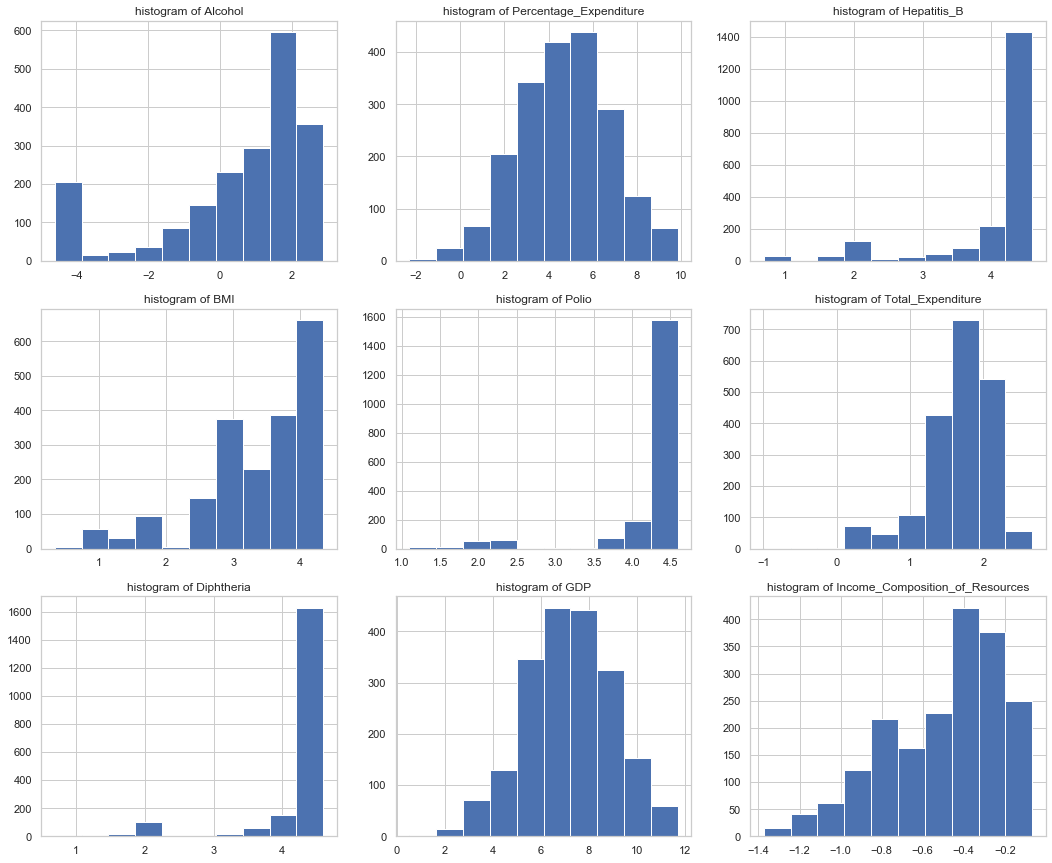

In [16]:
plt.figure(figsize=(18,15))


# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(np.log(lifeexpectancy_df["Alcohol"]))
plt.title("histogram of Alcohol")


plt.subplot(3, 3, 2)
plt.hist(np.log(lifeexpectancy_df["Percentage_Expenditure"]))
plt.title("histogram of Percentage_Expenditure")


plt.subplot(3, 3, 3)
plt.hist(np.log(lifeexpectancy_df["Hepatitis_B"]))
plt.title("histogram of Hepatitis_B")

plt.subplot(3, 3, 4)
plt.hist(np.log(lifeexpectancy_df["BMI"]))
plt.title("histogram of BMI")

plt.subplot(3, 3, 5)
plt.hist(np.log(lifeexpectancy_df["Polio"]))
plt.title("histogram of Polio")

plt.subplot(3, 3, 6)
plt.hist(np.log(lifeexpectancy_df["Total_Expenditure"]))
plt.title("histogram of Total_Expenditure")

plt.subplot(3, 3, 7)
plt.hist(np.log(lifeexpectancy_df["Diphtheria"]))
plt.title("histogram of Diphtheria")

plt.subplot(3, 3, 8)
plt.hist(np.log(lifeexpectancy_df["GDP"]))
plt.title("histogram of GDP")

plt.subplot(3, 3, 9)
plt.hist(np.log(lifeexpectancy_df["Income_Composition_of_Resources"]))
plt.title("histogram of Income_Composition_of_Resources")



plt.show()

Text(0.5, 1.0, 'Life_Expectancy vs GDP')

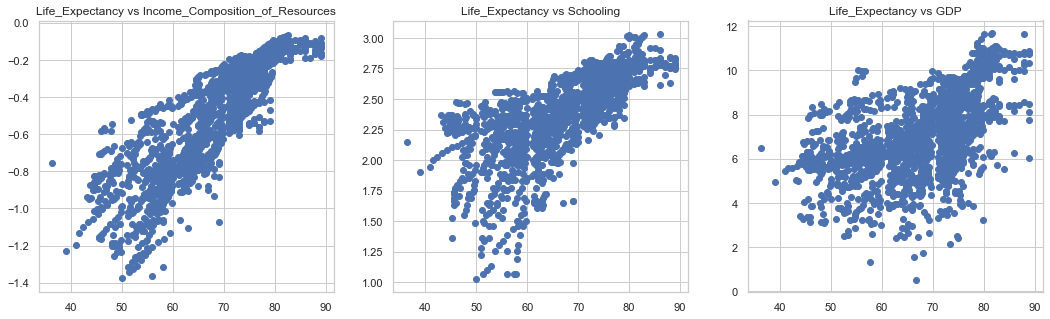

In [27]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["Income_Composition_of_Resources"]))
plt.title("Life_Expectancy vs Income_Composition_of_Resources")

plt.subplot(1,3,2)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["Schooling"]))
plt.title("Life_Expectancy vs Schooling")

plt.subplot(1,3,3)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["GDP"]))
plt.title("Life_Expectancy vs GDP")




### 4. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

np.log(lifeexpectancy_df["Schooling"])

np.log(lifeexpectancy_df["Percentage_Expenditure"])

np.log(lifeexpectancy_df["GDP"])

### 5. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

The three most correlated features are Income Composition fo Resources, Schooling and GDP with Income Composition of Resources has the most direct correlation with Life Expectancy. 